# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

## Rozmawiając z prowadzącym stwierdzono, że mimo tego, że testy nie przechodzą, to funkcje w main.py są dobrze napisane.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
import dill
from typing import Union, Tuple
import typing
from inspect import isfunction

7.38905609893065
-0.38212055882855767
(0.001953125, 8)
(0.9165636396397902, 3)


***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

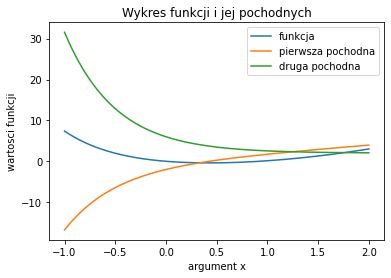

In [2]:
def fun(x):
    return np.exp(-2*x)+x**2-1

def dfun(x):
    return -2*np.exp(-2*x) + 2*x

def ddfun(x):
    return 4*np.exp(-2*x) + 2

x = np.linspace(-1,2,10000)
fig, ax1 = plt.subplots()

ax1.plot(x,fun(x),label='funkcja')
ax1.plot(x,dfun(x),label='pierwsza pochodna')
ax1.plot(x,ddfun(x),label='druga pochodna')
ax1.legend()
ax1.set(xlabel='argument x',ylabel='wartosci funkcji',title='Wykres funkcji i jej pochodnych')
fig.show()

WNIOSKI: Oba miejsca zerowe znajdują się na przedziale <-1, 1>. Patrząc na wykres pierwszej pochodnej możemy zauważyć, że zmienia ona znak z ujemnego na dodatni (a więc funkcja przestaje maleć a zaczyna rosnąć) dla x równego około 0.5. Funkcja jest na większości przedziału dodatnia, ujemna jest tylko przez chwilę właśne w okolicach tego ekstremum.

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

In [95]:
def bisection(a: Union[int,float], b: Union[int,float], f: typing.Callable[[float], float], epsilon: float, iteration: int) -> Tuple[float, int]:

    if type(a) not in [int, float] or type(b) not in [int, float]:
        print("ab")
        return None
    if type(epsilon) is not float or epsilon<0:
        print("eps", type(epsilon))
        return None
    if type(iteration) is not int or iteration<=0:
        print("itera")
        return None
    if not isfunction(f):
        print("isfunc")
        return None
    if f(a)*f(b) >=0:
        print("signs")
        return None
    n = 1
    while n<iteration:
        c = (a+b)/2
        if f(c) == 0 or (b-a)/2 < epsilon:
            return c, n
        n = n + 1
        if np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    
    print("finish")
    return c, n

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


In [4]:
def secant(a: Union[int,float], b: Union[int,float], f: typing.Callable[[float], float], epsilon: float, iteration: int) -> Tuple[float, int]:

    if type(a) not in [int, float] or type(b) not in [int, float]:
        return None
    if type(epsilon) is not float or epsilon<=0:
        return None
    if type(iteration) is not int or iteration<=0:
        return None
    if not isfunction(f):
        return None
    if f(a)*f(b) >= 0:
        return None
    a_n = a
    b_n = b
    n = 1
    for i in range(1,iteration+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n <= epsilon:
            return m_n, n
        else:
            return None
        n=n+1
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n)), n-1 

***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


In [49]:
def newton(f: typing.Callable[[float], float], df: typing.Callable[[float], float], ddf: typing.Callable[[float], float], a: Union[int,float], b: Union[int,float], epsilon: float, iteration: int) -> Tuple[float, int]:
    
    if type(a) not in [int, float] or type(b) not in [int, float]:
        return None
    if type(epsilon) is not float or epsilon<=0:
        return None
    if type(iteration) is not int or iteration<=0:
        return None
    if not isfunction(f) or not isfunction(df) or not isfunction(ddf):
        return None
    if f(a)*f(b) >=0:
        return None
    if a>b:
        return None
    if np.sign(df(b)) != np.sign(df(a)) or np.sign(ddf(b)) != np.sign(ddf(a)):
        return None
    x0 = (a+b)/2
    xn = x0
    for n in range(0,iteration):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            return xn, n
        dfxn = df(xn)
        if dfxn == 0:
            return None
        xn = xn - fxn/dfxn
        
    return xn, n

***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [6]:
from scipy import optimize

sol = optimize.root(fun,[0.1, 1])
print(sol.x)

[-5.80838612e-17  9.16562583e-01]


WNIOSKI dla funkcji ROOT z pakietu scipy.optimize: 
- Aby skorzystać z funkcji root należy podać do niej funkcję, której szukamy pierwiastków jako pierwszy argument i listę "strzałów" (z ang. guesses) która powinna mieć taką długość, jaką liczbę pierwiastków przewidujemy.

- nasze strzały powinny być możliwe bliskie prawdziwych wyników, przyspieszy to działanie funkcji. Najlepiej najpierw wyplotować sobie wykres funkcji, popatrzeć na to gdzie mniej więcej znajdują się miejsca zerowe i spróbować zgadnąć ich wartości,

- Gdy podamy oba argumenty równe np. 0.1 to oba znalezione pierwiastki będą jednakowe (oba strzały powędrują do tego samego pierwiastka, przybliżenia będą się minimalnie różnić),

- Jak widać wynik działania funkcji jest dość dobry, prawdziwe rozwiązanie to x = 0 a nasza funkcja znalazła wartość na poziomie zera maszynowego.

- Funkcja ta zwraca słownik przechowujący informacje o rozwiązaniu, aby uzyskać wartość x-ów należy skorzystać z klucza "x".

In [7]:
from scipy import optimize
sol = optimize.fsolve(fun,[0.1, 1])
print(sol)

[-5.80838612e-17  9.16562583e-01]


WNIOSKI dla funkcji FSOLVE z pakietu scipy.optimize:
- funkcja FSOLVE w przeciwieństwie do funkcji ROOT zwraca jako wynik wartość "x" a nie słownik,

- wyniki bardzo podobne do działania funkcji ROOT (zero maszynowe oraz wartość bliska 0.916),

- także gdy podamy dwie te same wartości jako "guessy" to dostaniemy powielony jeden pierwiastek. (Jednak przybliżenia będą różne - podobne, ale różne (np. 9.16 x 10^(-17) oraz 4 x 10^(-17)))

***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

ROZWIĄZANIE ZADANIA 6.

- Ustalam parametry, które będę później podawał do funkcji,
- Dziele przedział gdzie znajdują się oba rozwiązania na dwa przedziały po jednym rozwiązaniu <-1, 0.5> oraz <0.5,1>

In [83]:
a = -1
b = 0.5
c = 1
epsilon = 10e-10
max_iter = 100000

Znajduję miejsca zerowe za pomocą:

- Metody bisekcji

In [96]:
def zad6_M1(max_iter):
    a = -1
    b = 0.5
    c = 1
    epsilon = 10e-10
    sol1_x1 = bisection(a,b,fun,epsilon,max_iter)                          
    sol1_x2 = bisection(b,c,fun,epsilon,max_iter)  
    return sol1_x1, sol1_x2
x1, x2 = zad6_M1(100000)
print ("Metoda bisekcji\n x1 = ",x1[0])
print (" x2 = ",x2[0])

Metoda bisekcji
 x1 =  -2.3283064365386963e-10
 x2 =  0.9165625823661685


83.5 µs ± 5.73 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
finish
finish
297 µs ± 1.65 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
finish
finish
484 µs ± 5.19 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
finish
finish
726 µs ± 1.63 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
825 µs ± 11.8 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
1.08 ms ± 1.84 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
1.44 ms ± 2.26 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
1.67 ms ± 17.1 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


[Text(0, 0.5, 'błąd'),
 Text(0.5, 0, 'max_iter'),
 Text(0.5, 1.0, 'Wykres wartości błędu obliczeń')]

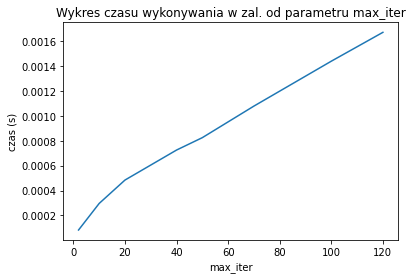

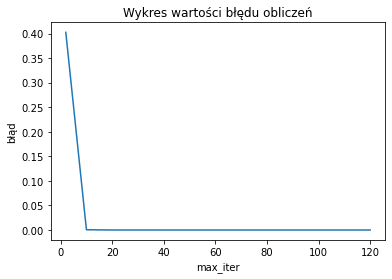

In [99]:
from scipy import optimize

max_iters = [2,10,20, 40, 50, 70, 100, 120]

a=-1
b=0.3
c=0.6
d=1
epsilon=10e-10

time_M1_list = list()
error_M1_list = list()
for max_iter in max_iters:
    #CZAS
    saved_timing = %timeit -r 3 -n 3 -o zad6_M2(max_iter)
    time_avg = saved_timing.average   # średni czas próby
    time_M1_list.append(time_avg)
    #BŁĘDY OBLICZEŃ
    valueM1 = zad6_M1(max_iter)
    valueFSOLVE =  optimize.fsolve(fun,[0.1, 1],maxfev=max_iter)
    error = np.abs(valueM1[0][0]+valueM1[1][0]-np.sum(valueFSOLVE))
    error_M1_list.append(error)

#PLOTOWANIE CZASU
fig, ax1 = plt.subplots()    
ax1.plot(max_iters,time_M1_list)
ax1.set(title="Wykres czasu wykonywania w zal. od parametru max_iter",xlabel="max_iter",ylabel="czas (s)")

#PLOTOWANIE BŁĘDÓW
fig, ax2 = plt.subplots()
ax2.plot(max_iters,error_M1_list)
ax2.set(title="Wykres wartości błędu obliczeń",xlabel="max_iter",ylabel="błąd")

- Metody siecznych

In [100]:
def zad6_M2(max_iter):
    a = -1
    b = 0.5
    c = 1
    epsilon = 10e-10
    sol2_x1 = secant(a,b,fun,epsilon,max_iter)
    sol2_x2 = secant(b,c,fun,epsilon,max_iter)
    return sol2_x1,sol2_x2
x1, x2 = zad6_M2(100000)
print("Metoda siecznych\n x1 = ",x1[0])
print(" x2 = ",x2[0])

Metoda siecznych
 x1 =  4.440892098500626e-16
 x2 =  0.9165625831056982


54 µs ± 6.74 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
79.6 µs ± 2.22 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
105 µs ± 2.37 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
157 µs ± 6.93 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
302 µs ± 9.21 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
476 µs ± 4.59 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
716 µs ± 16.4 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
843 µs ± 932 ns per loop (mean ± std. dev. of 3 runs, 3 loops each)
1.44 ms ± 3.77 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


[Text(0, 0.5, 'błąd'),
 Text(0.5, 0, 'max_iter'),
 Text(0.5, 1.0, 'Wykres wartości błędu obliczeń')]

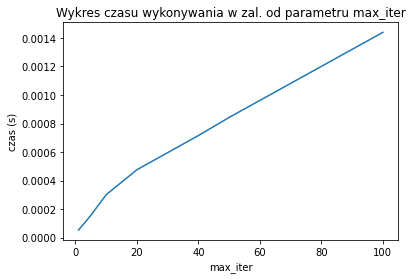

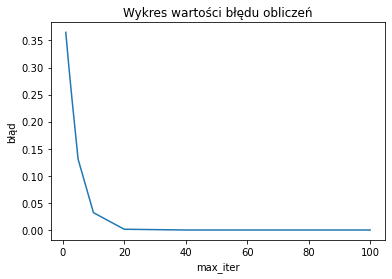

In [69]:
from scipy import optimize

max_iters = [1, 2, 3, 5, 10, 20, 40, 50, 100]

a=-1
b=0.3
c=0.6
d=1
epsilon=10e-10

time_M2_list = list()
error_M2_list = list()
for max_iter in max_iters:
    #CZAS
    saved_timing = %timeit -r 3 -n 3 -o zad6_M2(max_iter)
    time_avg = saved_timing.average   # średni czas próby
    time_M2_list.append(time_avg)
    #BŁĘDY OBLICZEŃ
    valueM2 = zad6_M2(max_iter)
    valueFSOLVE =  optimize.fsolve(fun,[0.1, 1],maxfev=max_iter)
    error = np.abs(valueM2[0][0]+valueM2[1][0]-np.sum(valueFSOLVE))
    error_M2_list.append(error)

#PLOTOWANIE CZASU
fig, ax1 = plt.subplots()    
ax1.plot(max_iters,time_M2_list)
ax1.set(title="Wykres czasu wykonywania w zal. od parametru max_iter",xlabel="max_iter",ylabel="czas (s)")

#PLOTOWANIE BŁĘDÓW
fig, ax2 = plt.subplots()
ax2.plot(max_iters,error_M2_list)
ax2.set(title="Wykres wartości błędu obliczeń",xlabel="max_iter",ylabel="błąd")

- Metody Newtona
    - ta funkcja nie działała dla paramterów a, b, c wybranych powyżej gdyż znak pochodnych się zmieniał, więc wybieram nowe parametry

In [47]:
def zad6_M3(max_iter):
    a=-1
    b=0.3
    c=0.6
    d=1
    epsilon = 10e-10
    sol3_x1 = newton(fun,dfun,ddfun,a,b,epsilon,max_iter)
    sol3_x2 = newton(fun,dfun,ddfun,c,d,epsilon,max_iter)
    return sol3_x1, sol3_x2
x1, x2 = zad6_M3(100000)
print("Metoda Newtona\n x1 = ",x1[0])
print(" x2 = ",x2[0])

Metoda Newtona
 x1 =  -3.330873735564372e-14
 x2 =  0.9165625831056993


62.1 µs ± 8.94 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
-0.019147019100558438
0.08007416548279189
56.1 µs ± 1.9 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
-0.019147019100558438
0.0005476981444763052
87.8 µs ± 3.1 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
-0.019147019100558438
0.013653120364604976
84.6 µs ± 3.19 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
0.005343648861266526
0.006455203075569571
88.9 µs ± 2.13 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
1.7596335680439942e-12
5.756062293471587e-12
118 µs ± 2.73 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
-5.80838612381484e-17
3.197442310920451e-14
117 µs ± 3.48 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
-5.80838612381484e-17
3.197442310920451e-14
91.7 µs ± 7.33 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
-5.80838612381484e-17
3.197442310920451e-14
87.4 µs ± 2.11 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
-5.80838612381484e-17
3.19

[Text(0, 0.5, 'błąd'),
 Text(0.5, 0, 'max_iter'),
 Text(0.5, 1.0, 'Wykres wartości błędu obliczeń')]

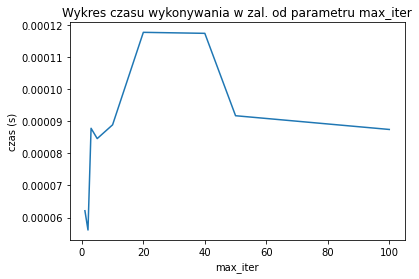

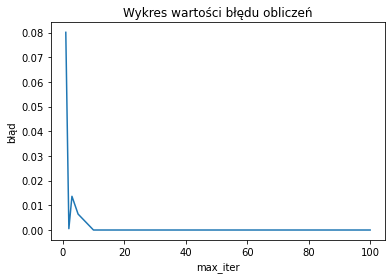

In [66]:
from scipy import optimize

max_iters = [1, 2, 3, 5, 10, 20, 40, 50, 100]

a=-1
b=0.3
c=0.6
d=1
epsilon=10e-10

time_M3_list = list()
error_M3_list = list()
for max_iter in max_iters:
    #CZAS
    saved_timing = %timeit -r 3 -n 3 -o zad6_M3(max_iter)
    time_avg = saved_timing.average   # średni czas próby
    time_M3_list.append(time_avg)
    #BŁĘDY OBLICZEŃ
    valueM3 = zad6_M3(max_iter)
    valueFSOLVE =  optimize.fsolve(fun,[0.1, 1],maxfev=max_iter)
    error = np.abs(valueM3[0][0]+valueM3[1][0]-np.sum(valueFSOLVE))
    error_M3_list.append(error)

#PLOTOWANIE CZASU
fig, ax1 = plt.subplots()    
ax1.plot(max_iters,time_M3_list)
ax1.set(title="Wykres czasu wykonywania w zal. od parametru max_iter",xlabel="max_iter",ylabel="czas (s)")

#PLOTOWANIE BŁĘDÓW
fig, ax2 = plt.subplots()
ax2.plot(max_iters,error_M3_list)
ax2.set(title="Wykres wartości błędu obliczeń",xlabel="max_iter",ylabel="błąd")

WNIOSKI:
 - Wszystkie metody (czyli rozwiązania poszczególnych podpunktów zadania 6) opakowałem w zewnętrzne funkcję, aby móc sprawnie podawać je do funkcji timecheck sprawdzającej czas obliczeń.

 - Wszystkie metody bardzo dobrze radzą sobie z obliczaniem miejsc zerowych przy czym: najmniej dokładnie liczby metoda bisekcji, najbardziej dokładnie liczy metoda siecznych, drugie miejsce zajmuje metoda Newtona.

 - Metodę Newtona należy jednak pochwalić za szybkość wykonywania, liczy ona średnio tylko 80 mikro sekund, jest to najlepszy wynik i bije na głowę metodę siecznych (która mimo, że jest najdokładniejsza wykonuje się ponad jedną sekundę!). Na drugim miejscu jest metoda bisekcji.

 - Najlepszym wyborem dla naszego problemu jest metoda Newtona, liczy ona bezkonkurencyjnie szybko z bardzo małym błędem (10^-14).